# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [122]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [123]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nathaliekelley/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [124]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [125]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [126]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 3716


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [127]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 1371


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [128]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.6908,0.000,0.16,0.840,Two alleged crypto traders in Singapore appare...
1,0.0000,0.000,0.00,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,0.063,0.00,0.937,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,0.000,0.00,1.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.3818,0.069,0.00,0.931,LONDON (Reuters) - Bitcoin jumped to its highe...


In [129]:
# Create the ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.7506,0.209,0.0,0.791,If you've interacted with cryptocurrencies in ...
1,0.0000,0.000,0.0,1.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.000,0.0,1.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
3,0.7579,0.181,0.0,0.819,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.000,0.0,1.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [130]:
# Describing the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.365290,0.075000,0.008000,0.917000
std,0.319038,0.046302,0.035777,0.046484
min,-0.690800,0.000000,0.000000,0.802000
25%,0.354650,0.067500,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.915250
max,0.750600,0.198000,0.160000,1.000000


In [131]:
# Describing the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.063062,0.015688,0.921312
std,0.298172,0.070121,0.034763,0.085886
min,-0.267700,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.871000
50%,0.000000,0.053500,0.000000,0.931000
75%,0.401900,0.097250,0.000000,1.000000
max,0.757900,0.209000,0.110000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Bitcoin had the highest mean positive score with .068.**

Q: Which coin had the highest compound score?

A: **Bitcoin also had the highest compound score with a max of 92%.**

Q. Which coin had the highest positive score?

A: **Bitcoin had the highest positive score with .267.**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [132]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathaliekelley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
lemmatizer = WordNetLemmatizer()

In [134]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [135]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens


In [136]:
# Create a new tokens column for bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.6908,0.000,0.16,0.840,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.0000,0.000,0.00,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,0.2732,0.063,0.00,0.937,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,0.0000,0.000,0.00,1.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."
4,0.3818,0.069,0.00,0.931,LONDON (Reuters) - Bitcoin jumped to its highe...,"[london, reuters, bitcoin, jumped, highest, ye..."


In [137]:
# Create a new tokens column for ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.7506,0.209,0.0,0.791,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.000,0.0,1.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.000,0.0,1.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
3,0.7579,0.181,0.0,0.819,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.0000,0.000,0.0,1.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [138]:
from collections import Counter
from nltk import ngrams

In [139]:
#tokenized Bitcoin articles
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
bitcoin_p

['two',
 'alleged',
 'crypto',
 'trader',
 'singapore',
 'apparently',
 'came',
 'foolproof',
 'plan',
 'rather',
 'convert',
 'customer',
 'singapore',
 'dollar',
 'bitcoin',
 'would',
 'simply',
 'rob',
 'victim',
 'came',
 'charsby',
 'alexis',
 'akwagyiram',
 'tom',
 'wilson',
 'monthly',
 'crypto',
 'transfer',
 'africa',
 'rise',
 'year',
 'much',
 'activity',
 'nigeria',
 'south',
 'africa',
 'kenya',
 'driven',
 'small',
 'business',
 'migrant',
 'charsthe',
 'covid',
 'pandemic',
 'ha',
 'resulted',
 'mass',
 'shift',
 'working',
 'home',
 'resulting',
 'increased',
 'use',
 'corporate',
 'vpn',
 'elimination',
 'inperson',
 'verification',
 'partially',
 'explain',
 'succes',
 'charslagoslondon',
 'reuters',
 'four',
 'month',
 'ago',
 'abolaji',
 'odunjo',
 'made',
 'fundamental',
 'change',
 'business',
 'selling',
 'mobile',
 'phone',
 'bustling',
 'street',
 'market',
 'lagos',
 'started',
 'paying',
 'supplier',
 'bitco',
 'charslondon',
 'reuters',
 'bitcoin',
 'jumped'

In [140]:
#tokenized Ethereum articles
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())
ethereum_p

['youve',
 'interacted',
 'cryptocurrencies',
 'past',
 'couple',
 'year',
 'good',
 'chance',
 'youve',
 'used',
 'metamask',
 'cryptocurrency',
 'wallet',
 'form',
 'browser',
 'extension',
 'support',
 'ether',
 'charstldr',
 'complete',
 'stock',
 'cryptocurrency',
 'investment',
 'toolkit',
 'bundle',
 'sale',
 'sept',
 'saving',
 'list',
 'pricethe',
 'world',
 'finance',
 'ha',
 'always',
 'complicated',
 'th',
 'charstldr',
 'mega',
 'blockchain',
 'mastery',
 'bundle',
 'sale',
 'august',
 'saving',
 'list',
 'pricecash',
 'isnt',
 'necessarily',
 'king',
 'anymore',
 'youve',
 'probably',
 'heard',
 'cryptocurrency',
 'bloc',
 'charslondon',
 'reuters',
 'sound',
 'like',
 'surefire',
 'bet',
 'lend',
 'money',
 'borrower',
 'put',
 'collateral',
 'exceeds',
 'size',
 'loan',
 'earn',
 'interest',
 'could',
 'possibly',
 'g',
 'charsnew',
 'york',
 'reuters',
 'brooklynbased',
 'technology',
 'startup',
 'consensys',
 'ha',
 'acquired',
 'jpmorgan',
 'chase',
 'amp',
 'cos',


In [141]:
# Generate the Bitcoin N-grams where N=2
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))

{('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'foolproof'): 1, ('foolproof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'charsby'): 1, ('charsby', 'alexis'): 1, ('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('business'

In [142]:
# Generate the Ethereum N-grams where N=2
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'youve'): 1, ('youve', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'charstldr'): 1, ('charstldr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 2, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 2, ('list', 'pricethe'): 1, ('pricethe', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'charstldr'): 1, ('charstldr', 'mega'): 1, ('mega', 'blockch

In [143]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [144]:
# Get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_p, 10)
bitcoin_common

[('bitcoin', 41),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('charsour', 13),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('daywelcome', 13)]

In [145]:
# Get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_p,10)
ethereum_common

[('bitcoin', 8),
 ('cryptocurrency', 7),
 ('ha', 4),
 ('ethereum', 4),
 ('youve', 3),
 ('charstldr', 3),
 ('bundle', 3),
 ('blockchain', 3),
 ('price', 3),
 ('past', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

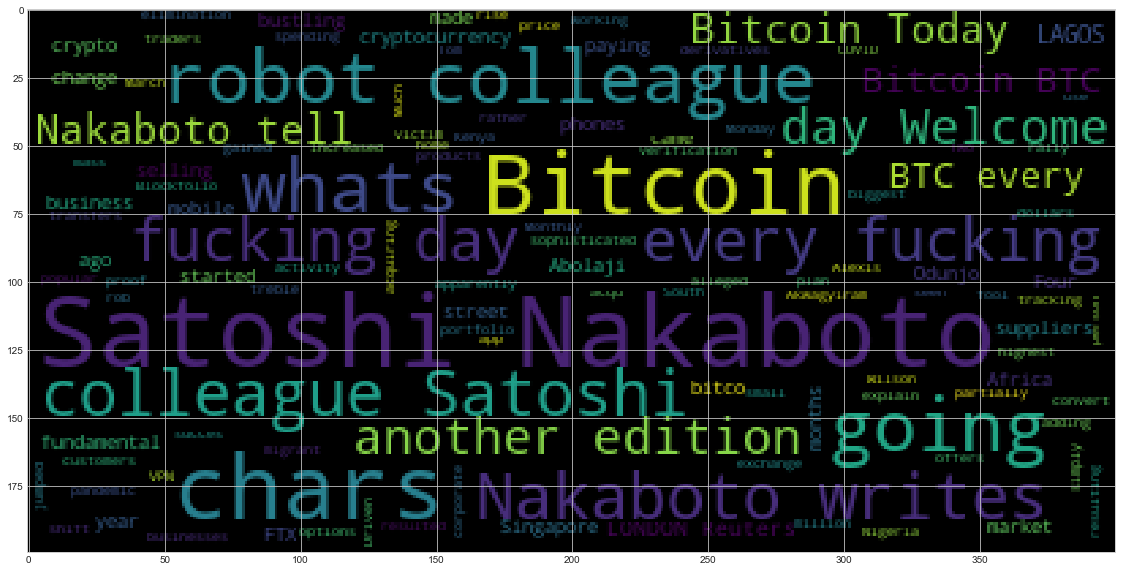

In [147]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud().generate(Bitcoin_df.Text.str.cat())
cloud1
plt.imshow(cloud1)

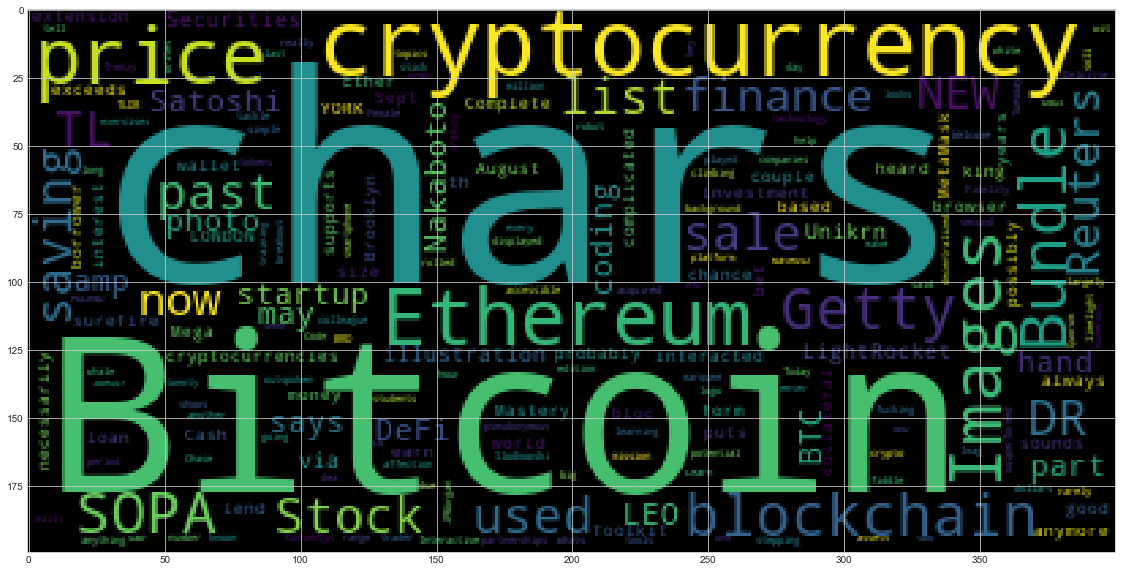

In [148]:
# Generate the Ethereum word cloud
cloud2 = WordCloud().generate(Ethereum_df.Text.str.cat())
cloud2
plt.imshow(cloud2)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [149]:
import spacy
from spacy import displacy

In [150]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [151]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [152]:
# Concatenate all of the bitcoin text together
all_concat_bitcoin = Bitcoin_df.Text.str.cat()
all_concat_bitcoin

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]LONDON (Reuters) - Bitcoin jumped to its highest in over a year on Monday, adding to a 2020 rally that has seen it more than treble in pr

In [153]:
# Run the NER processor on all of the text
# Add a title to the document
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc
bitcoin_doc.user_data["Title"] = "Bitcoin NER"


In [154]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [155]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
Alexis Akwagyiram PERSON
Tom Wilson
 PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year
 DATE
Nigeria GPE
South Africa GPE
Kenya GPE
COVID-19 PERSON
VPN ORG
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo PERSON
Lagos GPE
Reuters ORG
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo PERSON
Lagos GPE
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
every fucking day DATE
Bitcoin GPE
Today D

---

## Ethereum NER

In [156]:
# Concatenate all of the bitcoin text together
all_concat_ethereum = Ethereum_df.Text.str.cat()
all_concat_ethereum

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform

In [157]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [158]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [159]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

the past couple of years DATE
MetaMask PRODUCT
Ether ORG
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
29.81 MONEY
August 17 DATE
97% PERCENT
about 20% PERCENT
YORK ORG
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Co’s ORG
JPM.N GPE
Quorum GPE
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
Joe007 CARDINAL
UNUS SED LEO ORG
LEO ORG
the Interactive Learn to Code Bundle ORG
Satoshi Nakaboto PERSON
Bitcoin BTC ORG
every fucking day DATE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
more than 10% PERCENT
chars]$100 million CARDINAL
BRD ORG
Deloitte ORG
KPMG ORG
Fidelity ORG
100 MONEY
twenty dollars MONEY
Ethereum GPE
DeFi PERSON
Ethereum GPE
Mateusz Slodkowski PERSON
Getty Images PERSON
Bitcoin GPE
Getty Images PERSON
Bitcoin GPE
as high as $12,086 MONEY
Coinbase ORG
Ethereum PERSON
ETH ORG
chars]The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn PERSON
UnikoinGold P